# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [4]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer here-1st way
employee.pivot_table(index ='Department', values= 'Salary').head() 

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [8]:
# your answer here-2nd way
df = employee.groupby('Department')['Salary'].mean()
df.head()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [9]:
# your answer here
employee.pivot_table(index =['Department','Title'], values= 'Salary').head() 
#dam cool stuff.

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [11]:
# your answer here
employee.pivot_table(index =['Title'],
                     columns = {
                         'Years':'mean'
                     },
                     values= 'Salary',
                    fill_value = 0
                    ).head() 

Years,1,2,3,4,7,8
Title,,,,,,
VP,0,0,0,0,0,70
analyst,35,30,0,35,0,0
associate,0,55,55,0,60,0


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [12]:
# your answer here
employee.pivot_table(index ='Department', 
                     values= ['Salary','Name'],
                    aggfunc = {
                        'Salary':'mean',
                        'Name': 'count'
                    }
                    ).head() 

,Name,Salary
Department,,
HR,3,45.00
IT,4,48.75
Sales,2,55.00


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [15]:
# your answer here
employee.pivot_table(index =['Department','Title'], 
                     values= 'Salary',
                     aggfunc = {
                     'Salary':['max','median','min','std']    
                     }).head() 
#  no std for jobs with one person.

max  median   min       std
Department Title                                  
HR         VP         70.0    70.0  70.0       NaN
           analyst    35.0    32.5  30.0  3.535534
IT         VP         70.0    70.0  70.0       NaN
           analyst    35.0    32.5  30.0  3.535534
           associate  60.0    60.0  60.0       NaN

#### Based on your comments, fill the missing values with an appropriate value

In [20]:
# your answer here
employee.pivot_table(index =['Department','Title'], 
                     values= 'Salary',
                     fill_value = 0,
                     aggfunc = {
                     'Salary':['max','median','min','std'],
                    
                     }).head()

max  median  min       std
Department Title                                
HR         VP          70    70.0   70  0.000000
           analyst     35    32.5   30  3.535534
IT         VP          70    70.0   70  0.000000
           analyst     35    32.5   30  3.535534
           associate   60    60.0   60  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [22]:
# your answer here
employee.pivot_table(index ='Department', 
                     values= ['Salary','Name'],
                    aggfunc = {
                        'Salary':'sum',
                        'Name': 'count'
                    }
                    ).head() 

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [24]:
# your answer here
employee.pivot_table(index =['Department','Title'], 
                     values= ['Salary', 'Years'],
                    aggfunc = {
                        'Salary':'mean',
                        'Years': 'sum'
                    }
                    ).head() 

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [26]:
# your answer here
fitbit = pd.read_csv ('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [27]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [29]:
# your answer here
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes'],
      dtype='object')

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [31]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])
#a positive correlation, though not to strong, posibly exponential?

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

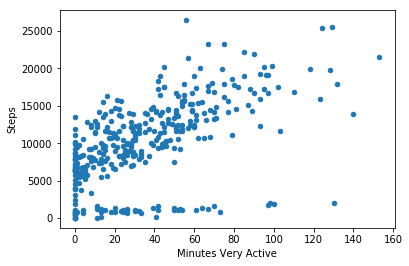

In [35]:
# your answer here
import matplotlib.pyplot as plt
fitbit.plot('Minutes Very Active','Steps', kind= 'scatter')


#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
# seems vaigely linear...
# but not completely one to one.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [36]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'],method = 'pearson')
# nope, none at all. 

0.07690608062990094

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

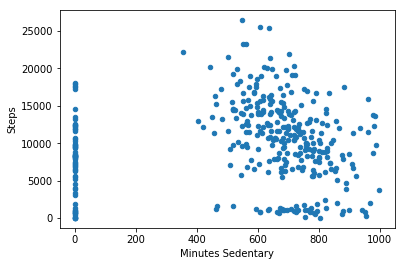

In [37]:
# your answer here
fitbit.plot('Minutes Sedentary','Steps', kind= 'scatter')

In [22]:
# Your comment here
# yea, 
# there is no linear nor exponential relation ship. 
# posibly a geometric one? deffinatly see defined groupings in it...

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [40]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'],method = 'pearson')
# as before, not much of a linear relationship.

0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

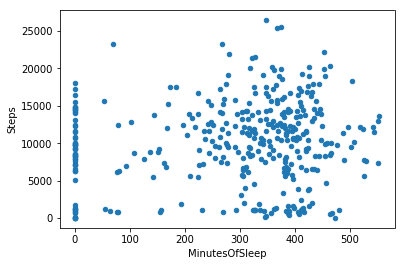

In [41]:
# your answer here
fitbit.plot('MinutesOfSleep','Steps', kind= 'scatter')
#jup, just scattered points, 

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [57]:
# your answer here
# cor_fit = fitbit['Calorie burned'].corr(fitbit['MinutesOfSleep'],method = 'pearson')
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

In [58]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [27]:
# your answer here
# the only ones that had a good linear correlation were minutes very active and steps.
# and the columns with themselves. the rest had no notisable correlation. 

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [60]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [61]:
#Print time_grades
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

In [65]:
# your answer here
time_grades['Study time'].value_counts('Grade')
# not sure if this was what was asked. .

7     0.133333
20    0.066667
18    0.066667
13    0.066667
12    0.066667
11    0.066667
10    0.066667
9     0.066667
8     0.066667
6     0.066667
5     0.066667
4     0.066667
3     0.066667
2     0.066667
Name: Study time, dtype: float64

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [69]:
# your answer here-Pearson 
print (time_grades['Grade'].corr(time_grades['Study time'], method= 'pearson'))
print (time_grades['Grade'].corr(time_grades['Study time'], method= 'spearman'))

0.7980456073578858
0.819658753036942


In [32]:
## your answer here-Spearman
# a strong linear correlation
# and an slightly stronger exponential correlation. 

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

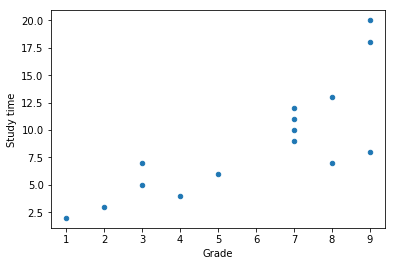

In [76]:
# your answer here
time_grades.plot('Grade', 'Study time', kind= 'scatter')

In [72]:
#your comment here
# there is a correlation betwwen the two.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
# if memory serves, Pearson sees if there is a linear correlation, I donot know the math but it seems to care weather 
# distance between point a to b = distance between b to c. where as spear man seems to measures that said distance
# increases or decreases consistently.